# <center>Active and Volumetric Stereo</center>
#### <center>Presented by: Maxwell Jung</center>

Captured Image                                      | 3D Reconstruction
:--------------------------------------------------:|:-------------------------:
<img src="img/hand_fist_pattern.jpg" alt="hand_fist_pattern" width="500"/> | <img src="img/hand_fist_polygon.gif" alt="hand_fist_polygon" width="500"/>

Source: [Rapid Shape Acquisition Using Color Structured Light and Multi-pass Dynamic Programming](https://grail.cs.washington.edu/projects/moscan/)

# Agenda

1. Introduce Active Stereo
    1. Point method
    2. Line method
    3. Pattern method
2. Demo Active Stereo
3. Introduce Volumetric Stereo
    1. Space Carving
    2. Shadow Carving
    3. Voxel Coloring
4. Demo Volumetric Stereo
5. Recent papers


# Examples

Captured Image (line method)                        | 3D Reconstruction
:--------------------------------------------------:|:-------------------------:
<img src="img/digitalmichelangelo.jpg" alt="digitalmichelangelo" width="500"/> | <img src="img/david3d.jpg" alt="david3d" width="500"/>

Source: [The Digital Michaelangelo project](https://accademia.stanford.edu/mich/)


# Examples - cont.

Captured Image (pattern method)                       | 3D Reconstruction
:--------------------------------------------------:|:-------------------------:
<img src="img/speckle-a.png" alt="speckle-a" width="500"/> | <img src="img/speckle-b.png" alt="speckle-b" width="500"/>

Source: [Rapid Shape Acquisition Using Color Structured Light and Multi-pass Dynamic Programming](https://grail.cs.washington.edu/projects/moscan/)

# Examples - cont.

Captured Images (Space Carving)                       | 3D Reconstruction
:--------------------------------------------------:|:-------------------------:
<img src="img/space-carving-hands.jpeg" alt="space-carving-hands" width="500"/> | <img src="img/space-carving-hands-result.png" alt="space-carving-hands-result" width="500"/>

Source: [A Theory of Shape by Space Carving](https://www.cs.toronto.edu/~kyros/pubs/00.ijcv.carve.pdf)

# Traditional Stereo - Triangulation

Given
  - Pixels $p$ and $p'$ corresponding to the same 3D point $P$
  - Calibrated Cameras (intrisic and extrinsic properties are known)

Outcome
  - Location of point $P$

<img src="img/traditional-stereo.png" alt="traditional-stereo" width="600"/>

<center>Source: <a href="https://cvgl.stanford.edu/teaching/cs231a_winter1415/lecture/lecture8_volumetric_stereo.pdf">Stanford CS231A lecture 8</a></center>




# Traditional Stereo - Correspondence Problem

How to ensure pixels $p$ and $p'$ **correspond** to the same 3D point $P$?

Easy for humans, very difficult for computers - Sparse vs Dense correspondence

<img src="img/correspondence.png" alt="correspondence" width="1000"/>

<center>Source: <a href="https://srs.amsi.org.au/student-blog/what-is-dense-correspondence/">SRS - What is Dense Correspondence?</a></center>




# Solution: Active Stereo (Point)

- Physically mark the object with an identifiable dot
    - Replace camera and image plane with projector and projector virtual plane
- Reconstruction
    1. Scan the dot across the surface of the object (ideally one pixel per dot)
        - 307200 unique images required to reconstruct 640 $\times$ 480 resolution image
    2. Calculate coordinate of each dot using triangulation

<img src="img/active-point.png" alt="active-point" width="600"/>

<center>Source: <a href="https://cvgl.stanford.edu/teaching/cs231a_winter1415/lecture/lecture8_volumetric_stereo.pdf">Stanford CS231A lecture 8</a></center>




# Active Stereo (Line)

- Speeds up Point method by projecting a line instead of a single dot
- Reconstruction
    1. Scan line across the surface of the object (ideally one line per row/column)
        - 480 images required to reconstruct 640 $\times$ 480 resolution image
    2. Calculate intersection of line and plane to reconstruct depth of each pixel on the line

<img src="img/active-line.png" alt="active-line" width="600"/>

<center>Source: <a href="https://cvgl.stanford.edu/teaching/cs231a_winter1415/lecture/lecture8_volumetric_stereo.pdf">Stanford CS231A lecture 8</a></center>




# Active Stereo (Line) - Math

<img src="img/active-line-math.png" alt="active-line-math" width="500"/>

Source: [First Principles of Computer Vision](https://youtu.be/3S3xLUXAgHw?si=-YDtpRHqVZD3M_Bx)


# Active Stereo (Line) - Math

Equation of line - start from $l_o$ and move in the direction of $l$

$p = l_o + ld$

Equation of plane - all points perpendicular to some normal vector $n$

$(p - p_o) \cdot n = 0$

Substitue $p$ from the line to the plane

$(l_o + ld - p_o) \cdot n = 0$

$d = \frac{(p_o - l_o) \cdot n}{l \cdot n}$

note that $l_o$ is the camera origin $(0, 0, 0)$, so

$\frac{(p_o - l_o) \cdot n}{l \cdot n} = \frac{p_o \cdot n}{l \cdot n}$

turns out, for a plane with equation, $Ax + Bx + Cx + D = 0$

$\frac{p_o \cdot n}{l \cdot n} = \frac{D}{Ax + By + Cf}$


Source: [Wikipedia: Line-plane intersection](https://en.wikipedia.org/wiki/Line%E2%80%93plane_intersection#:~:text=In%20analytic%20geometry%2C%20the%20intersection,the%20plane%20but%20outside%20it.)


# Active Stereo (Line) - Example

Laser Scanning                        | 3D Reconstruction
:--------------------------------------------------:|:-------------------------:
<img src="img/digitalmichelangelo.jpg" alt="digitalmichelangelo" width="500"/> | <img src="img/david3d.jpg" alt="david3d" width="500"/>

Source: [The Digital Michaelangelo project](https://accademia.stanford.edu/mich/)


# Active Stereo (Pattern)

- Extension of the Active Stereo Point method
    - Project multiple dots/lines covering a wide area
        - Correspondence issue
            - solution: Binary Coded Structured Light or unique colors
- Reconstruction
    1. Calculate coordinates of each dot/line using triangulation
    2. Generate mesh from point cloud

<img src="img/active-pattern.png" alt="active-pattern" width="600"/>

<center>Source: <a href="https://cvgl.stanford.edu/teaching/cs231a_winter1415/lecture/lecture8_volumetric_stereo.pdf">Stanford CS231A lecture 8</a></center>




# Active Stereo (Pattern) - Example

- Microsoft Kinect for Xbox
- Project pseudo-random pattern of infrared dots
    - psueo-random pattern guarantees unique correspondence by comparing neighboring patterns
    - works well under any ambient light conditions

<img src="img/kinect.png" alt="kinect" width="600"/>

<center>Source: <a href="https://www.mdpi.com/2220-9964/6/11/349">A Post-Rectification Approach of Depth Images of Kinect v2 for 3D Reconstruction of Indoor Scenes</a></center>


# Active Stereo - Line Demo

1. Capture input images
2. Apply algorithm on captured images

In [1]:
# Simulate Active Stereo Line method using open3d
import open3d as o3d
import numpy as np
import matplotlib.pyplot as plt
import os
import random

# Import Stanford Bunny 3D mesh
bunny_mesh = o3d.data.BunnyMesh()
mesh = o3d.io.read_triangle_mesh(bunny_mesh.path)

# Center mesh to origin
mesh = mesh.translate(-mesh.get_center())
# Normalize mesh to radius 1 bounding box
mesh = mesh.scale(scale=2/(max(mesh.get_minimal_oriented_bounding_box().get_max_bound())
                           - min(mesh.get_minimal_oriented_bounding_box().get_min_bound())),
                  center=[0, 0, 0])

# Visualize mesh
mesh.compute_vertex_normals()
o3d.visualization.draw_geometries([mesh])

# Create a scene and add the bunny mesh
scene = o3d.t.geometry.RaycastingScene()
bunny = o3d.t.geometry.TriangleMesh.from_legacy(mesh)
bunny_id = scene.add_triangles(bunny)

# Create laser scanner by horizontally stacking 100,000 raycasts
# Probably better way to do this but whatever
rays = o3d.t.geometry.RaycastingScene.create_rays_pinhole(
    fov_deg=90,
    center=[0, -0.2, 0], # Point scanner at (0, -0.2, 0)
    eye=[1, 1, 1], # Place laser scanner on (1, 1, 1)
    up=[0, -1, 0],
    width_px=100_000,
    height_px=1,
)
rays = rays.reshape((rays.shape[0]*rays.shape[1], 6))

# Calculate intersection coordinates using ray_ids
lx = scene.list_intersections(rays)
lx = {k:v.numpy() for k,v in lx.items()}
c = rays[lx['ray_ids']][:,:3] + rays[lx['ray_ids']][:,3:]*lx['t_hit'][...,None]
intersections_pc = o3d.t.geometry.PointCloud(positions=c)

# Visualize the rays and intersections
lasers = o3d.t.geometry.LineSet()
ray_orig = rays[:, :3].numpy()
ray_dest = ray_orig + rays[:, 3:].numpy()
lasers.point.positions = np.hstack([ray_orig,ray_dest]).reshape(-1,3)
lasers.line.indices = np.arange(lasers.point.positions.shape[0]).reshape(-1,2)
lasers.line.colors = np.full((lasers.line.indices.shape[0],3), (1,0,0)) # red color

# Visualize with laser plane
geometry_list = [
    o3d.t.geometry.TriangleMesh.to_legacy(bunny), 
    o3d.t.geometry.LineSet.to_legacy(lasers), 
    o3d.t.geometry.PointCloud.to_legacy(intersections_pc).paint_uniform_color([1, 0, 0]) # red color
]
o3d.visualization.draw_geometries(geometry_list)

# Visualize without laser plane
geometry_list = [
    o3d.t.geometry.TriangleMesh.to_legacy(bunny), 
    o3d.t.geometry.PointCloud.to_legacy(intersections_pc).paint_uniform_color([1, 0, 0]) # red color
]


o3d.visualization.draw_geometries(geometry_list)

In [ ]:
# Generate dataset
import open3d as o3d
import numpy as np
import matplotlib.pyplot as plt
import os
import random

# Import Stanford Bunny 3D mesh
bunny_mesh = o3d.data.BunnyMesh()
mesh = o3d.io.read_triangle_mesh(bunny_mesh.path)

# Center mesh to origin
mesh = mesh.translate(-mesh.get_center())
# Normalize mesh to radius 1 bounding box
mesh = mesh.scale(scale=2/(max(mesh.get_minimal_oriented_bounding_box().get_max_bound())
                           - min(mesh.get_minimal_oriented_bounding_box().get_min_bound())),
                  center=[0, 0, 0])
mesh.compute_vertex_normals()

# Create a scene and add the bunny mesh
scene = o3d.t.geometry.RaycastingScene()
bunny = o3d.t.geometry.TriangleMesh.from_legacy(mesh)
bunny_id = scene.add_triangles(bunny)

def scan_once(vis, y, foldername='dataset/bunny-scans', filename=f'scan'):
    rays = o3d.t.geometry.RaycastingScene.create_rays_pinhole(
        fov_deg=90,
        center=[0, y, 0], # Point scanner towards (0, 0, 0)
        eye=[1, 1, 1], # Place laser scanner at (1, 1, 1)
        up=[0, -1, 0],
        width_px=100_000, # Stack 100,000 raycasts horizontally to form a plane
        height_px=1,
    )
    rays = rays.reshape((rays.shape[0]*rays.shape[1], 6))
    
    # Compute the ray intersections.
    lx = scene.list_intersections(rays)
    lx = {k:v.numpy() for k,v in lx.items()}

    # Calculate intersection coordinates using ray_ids
    c = rays[lx['ray_ids']][:,:3] + rays[lx['ray_ids']][:,3:]*lx['t_hit'][...,None]
    intersections_pc = o3d.t.geometry.PointCloud(positions=c)
    
    # Add bunny and intersections to visualizer
    vis.clear_geometries()
    vis.add_geometry(o3d.t.geometry.TriangleMesh.to_legacy(bunny))
    if intersections_pc.point.positions.shape[0] > 0:
        vis.add_geometry(o3d.t.geometry.PointCloud.to_legacy(intersections_pc).paint_uniform_color([1, 0, 0]))

    # Write image to disk
    if not os.path.exists(foldername):
        os.makedirs(foldername)
    vis.capture_screen_image(f"{foldername}/{filename}.png", do_render=True)
    print(f'Captured {foldername}/{filename}.png')

vertical_resolution = 480
bunny_scans = []

vis = o3d.visualization.Visualizer()
vis.create_window(width=680, height=vertical_resolution, left=0, top=0, visible=False)
vis.get_render_option().point_size = 2
for i in range(vertical_resolution):
    # evenly scan 3D mesh from y = -1 to 1
    scan_once(vis, y=-1 + 2 * (i/vertical_resolution), filename=i)

camera_params = vis.get_view_control().convert_to_pinhole_camera_parameters()
extrinsic = camera_params.extrinsic
intrinsic = camera_params.intrinsic.intrinsic_matrix
focal = camera_params.intrinsic.get_focal_length()

print(f'{extrinsic=}')
print(f'{intrinsic=}')
print(f'{focal=}')

np.save("dataset/bunny-scans/extrinsic", extrinsic)
np.save("dataset/bunny-scans/intrinsic", intrinsic)

vis.destroy_window()

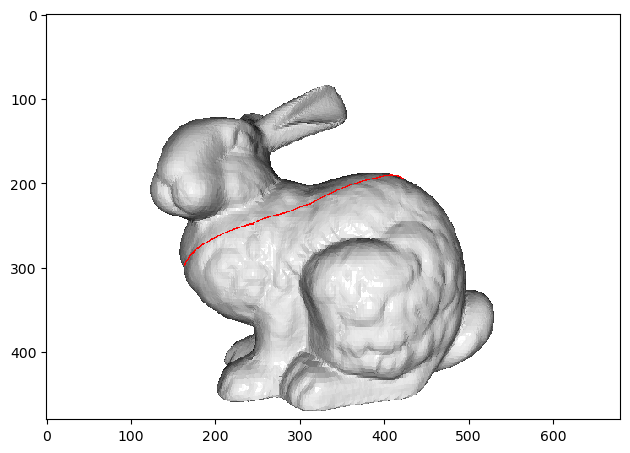

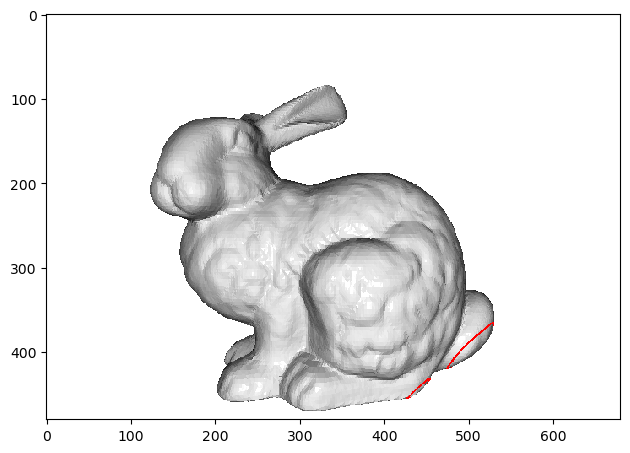

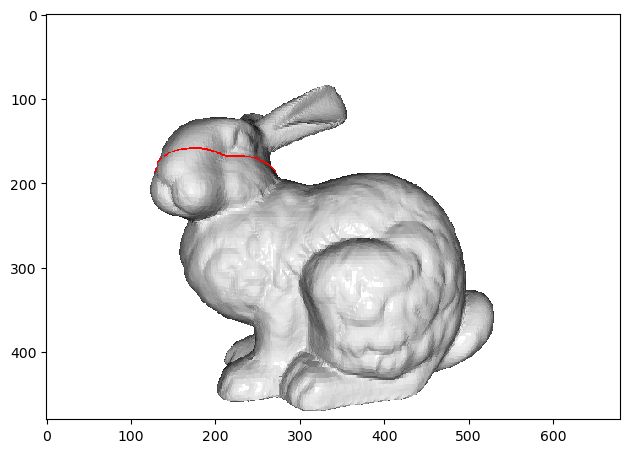

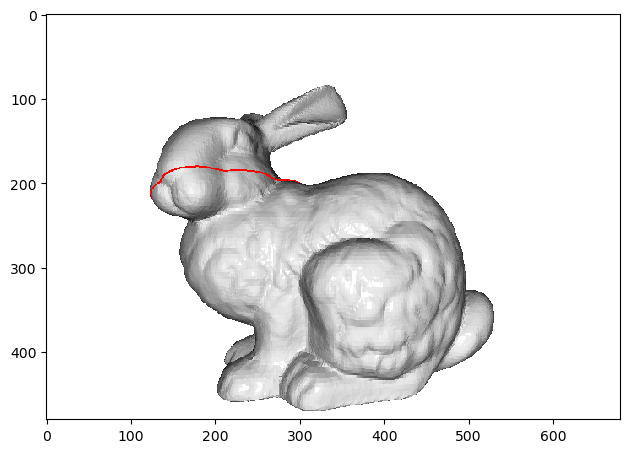

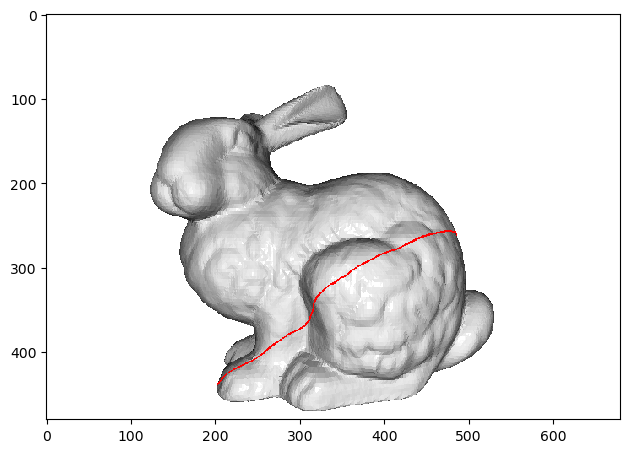

In [2]:
import skimage as ski
import random
import cv2
import numpy as np
import open3d as o3d

# Read all images in folder
dataset_dir = 'dataset/bunny/*.png'
dataset = ski.io.imread_collection(dataset_dir)
vertical_resolution = len(dataset)

# Display 5 random images
for i in range(5):
    img = random.choice(dataset)
    ski.io.imshow(img)
    ski.io.show()

# Retrieve Camera parameters
extrinsic = np.load("dataset/bunny/extrinsic.npy")
intrinsic = np.load("dataset/bunny/intrinsic.npy")

f_x = intrinsic[0,0]
f_y = intrinsic[1,1]
pixels_per_meter = 170 # this value needs verification
f = f_x/pixels_per_meter
o_x = intrinsic[0,2]
o_y = intrinsic[1,2]

def pixel_to_cam_x(u, z):
    return (u - o_x) * z/f_x

def pixel_to_cam_y(v, z):
    return (v - o_y) * z/f_y

def get_plane_eq(u, v):
    n = np.cross(v, u)
    n_hat = n / np.linalg.norm(n)
    
    # equation of plane
    # n_x(x - o_x) + n_y(y - o_y) + n_z(z - o_z) = 0
    # (o_x, o_y, o_z) = (1, 1, 1)
    # n_x(x) - n_x(o_x) + n_y(y) - n_y(o_y) + n_z(z) - n_z(o_z) = 0
    # n_x(x) + n_y(y) + n_z(z) - n_x(o_x) - n_y(o_y) - n_z(o_z) = 0
    A = n_hat[0]
    B = n_hat[1]
    C = n_hat[2]
    D = - (n_hat @ projector_origin)
    
    return A, B, C, D

def get_red_pixel_coords(img):
    result = img.copy()
    img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    lower = np.array([0,50,0])
    upper = np.array([179,255,255])
    mask = cv2.inRange(img, lower, upper)
    px, py = np.where(mask!=0)
    return px, py

projector_origin = extrinsic.dot(np.array([1, 1, 1, 1]))[:3]
points = []
for i in range(vertical_resolution):
    projector_dest = extrinsic.dot(np.array([0, -1 + 2 * (i/vertical_resolution), 0 , 1]))[:3]
    u = projector_dest - projector_origin
    v = extrinsic.dot([1, 0, -1, 1])[:3]
    
    A, B, C, D = get_plane_eq(u, v)
    
    img = ski.util.img_as_ubyte(dataset[i])
    py, px = get_red_pixel_coords(img)
    
    # Skip images without any scan
    if len(px) == 0: continue
    
    x = pixel_to_cam_x(px, 1)
    y = pixel_to_cam_y(py, 1)
    z = D/(A*x + B*y + C*f)
    
    xyz = np.stack((x, y, z)).T
    points.append(xyz)

# Visualize Reconstruction
points = np.vstack(points)
pcd = o3d.geometry.PointCloud()
pcd.points = o3d.utility.Vector3dVector(points)
o3d.visualization.draw_geometries([pcd])

# Volumetric Stereo

- Work backwards from the 3D point to the individual projections
    1. Assume point $P$ is part of an enclosed object
    2. Calculate the expected projection of $P$ for each camera
    3. Check if the expected projection matches the actual projection (**consistency check**)
    4. Mark $P$ as part of the object

<img src="img/vstereo.png" alt="vstereo" width="600"/>


# Volumetric Stereo - Consistency Check

- Space Carving
    - Check if silhouettes match
- Shadow Carving
    - Check if shadows match
- Voxel Coloring
    - Check if colors match

# Space Carving - Intuition

- Silhouettes provide useful 3D information

Silhouette | Object
:--------------------------------------------------:|:-------------------------:
<img src="img/toy-dino-silhouette.png" alt="toy-dino-silhouette" width="500"/> | <img src="img/toy-dino.png" alt="toy-dino" width="500"/>


# Space Carving - Visual Cone

- Create a cone in the shape of the silhouette starting from the camera origin and extending to infinity
    - Volume covered by cone represents the set of points that can produce to the observed silhouette

<img src="img/silhouette-cone.png" alt="silhouette-cone" width="600"/>


# Space Carving - Visual Hull

- Intersection of all Visual Cones
- Represents the set of points that produces **all** observed silhouettes

<img src="img/visual-hull.png" alt="visual-hull" width="600"/>


# Space Carving - Voxels

- 3D version of a pixel

<img src="img/voxel.png" alt="voxel" width="600"/>


# Space Carving - Voxel Implementation

- Iterate over each voxel and check if each voxel is inside the Visual Hull
    - $O(n^3)$ time complexity
        - Use Octrees for complexity reduction

<img src="img/voxel-carving.png" alt="voxel-carving" width="600"/>


# Space Carving - Limitations

- Need a lot of silhouettes at many different angles for high accuracy
- Impossible to detect concavitiy

<img src="img/concavity.png" alt="concavity" width="600"/>


# Shadow Carving - Intuition

- Concave surfaces often cast shadows onto itself
    - Augment Space Carving with shadows to estimate concavity

<img src="img/crater.png" alt="crater" width="600"/>


# Shadow Carving - Setup

- Take multiple photos with different lighting conditions
    - One light source per photo

<img src="img/shadow-carving-setup.png" alt="shadow-carving-setup" width="600"/>


# Shadow Carving - Voxel Implementation

1. Obtain upper bound estimate using Space Carving
2. Project shadow onto upper bounded surface
3. Project shadow from upper bounded surface to virtual light image
4. Remove voxels that project to both image shadow and virtual image shadow
- $O((k+1)n^3)$ time complexity for $k$ lights and $n \times n \times n$ voxel resolution

<img src="img/shadow-carving.png" alt="shadow-carving" width="600"/>


# Shadow Carving (vs. Space Carving)

<img src="img/space-vs-shadow.png" alt="space-vs-shadow" width="600"/>
<img src="img/space-vs-shadow2.png" alt="space-vs-shadow2" width="600"/>


# Voxel Coloring
- Check if the color of voxels sufficiently match between projections
- Advantage
    - colored 3D reconstruction
- Disadvantage
    - cannot guarantee unique solution
    - requires Lambertian surface (constant luminance across viewpoints)

<img src="img/voxel-coloring.png" alt="voxel-coloring" width="600"/>


# Voxel Coloring - Ambiguity

- Different 3D reconstructions can produce the same 2D projections
- solution: visibility constraint
    - traverse voxels layer by layer starting from ones closest to camera
    - ensure voxel is viewable by at least 2 cameras

<img src="img/voxel-coloring-ambig.png" alt="voxel-coloring-ambig" width="600"/>


# Voxel Coloring - Results

Input | Voxel Coloring Output
:--------------------------------------------------:|:-------------------------:
<img src="img/dino.gif" alt="dino" width="500"/> | <img src="img/dino-3d.gif" alt="dino-3d" width="500"/>


# Volumetric Stereo - Space Carving Demo

1. Capture input images
2. Apply Space Carving Algorithm

In [3]:
# Simulate Space Carving method using open3d
import open3d as o3d
import numpy as np
import matplotlib.pyplot as plt
import os
import random

# Import Stanford Bunny 3D mesh
bunny_mesh = o3d.data.BunnyMesh()
mesh = o3d.io.read_triangle_mesh(bunny_mesh.path)

# Center mesh to origin
mesh = mesh.translate(-mesh.get_center())
# Normalize mesh to radius 1 bounding box
mesh = mesh.scale(scale=2/(max(mesh.get_minimal_oriented_bounding_box().get_max_bound())
                           - min(mesh.get_minimal_oriented_bounding_box().get_min_bound())),
                  center=[0, 0, 0])

# Visualize mesh
mesh.compute_vertex_normals()
o3d.visualization.draw_geometries([mesh])

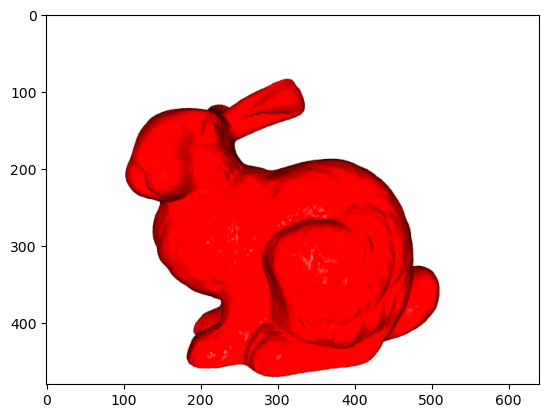

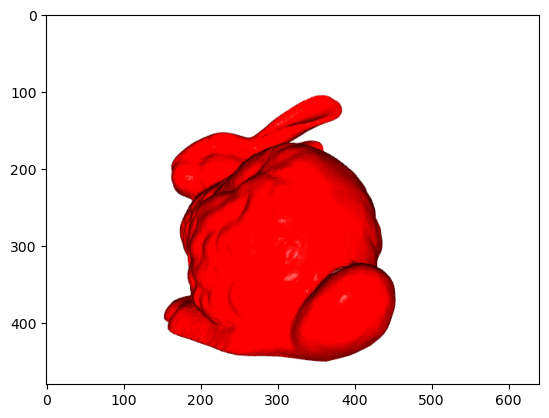

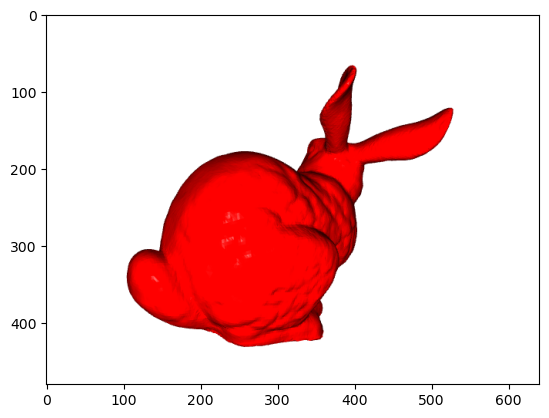

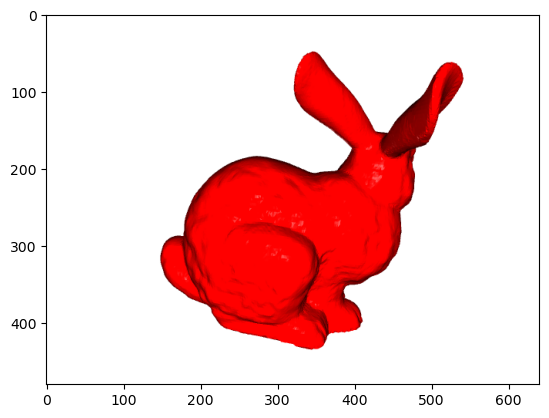

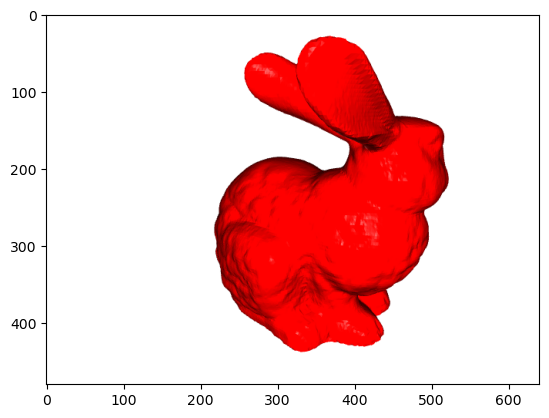

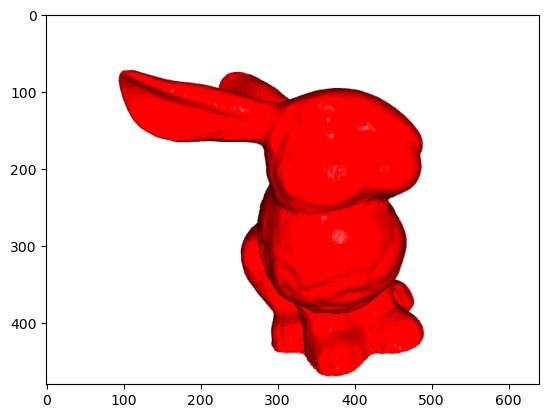

(6, 480, 640, 3)
(6, 4, 4)
(6, 3, 3)


In [4]:
# Capture images and camera parameters
images = []
extrinsics = []
intrinsics = []

def custom_draw_geometry_with_key_callback(mesh):
    def capture_image(vis):
        image = vis.capture_screen_float_buffer()
        camera_params = vis.get_view_control().convert_to_pinhole_camera_parameters()
        extrinsic = camera_params.extrinsic
        intrinsic = camera_params.intrinsic.intrinsic_matrix
        
        images.append(image)
        extrinsics.append(extrinsic)
        intrinsics.append(intrinsic)
        
        plt.imshow(np.asarray(image))
        plt.show()
        return False

    key_to_callback = {}
    key_to_callback[ord(".")] = capture_image
    o3d.visualization.draw_geometries_with_key_callbacks([mesh], key_to_callback, width=640, height=480)
    
custom_draw_geometry_with_key_callback(mesh.paint_uniform_color([1, 0, 0]))

images = np.array(images)
extrinsics = np.array(extrinsics)
intrinsics = np.array(intrinsics)

print(images.shape)
print(extrinsics.shape)
print(intrinsics.shape)

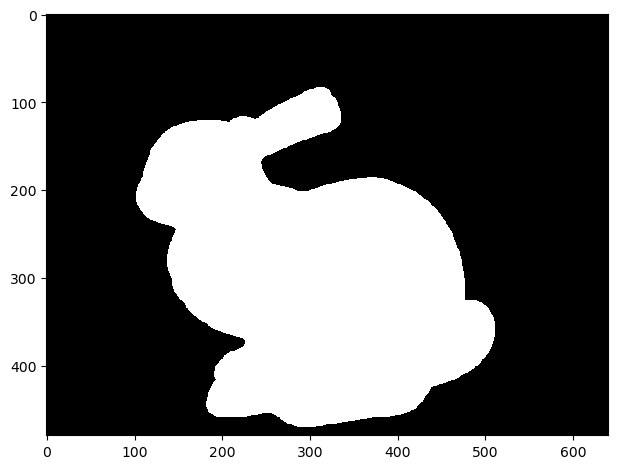

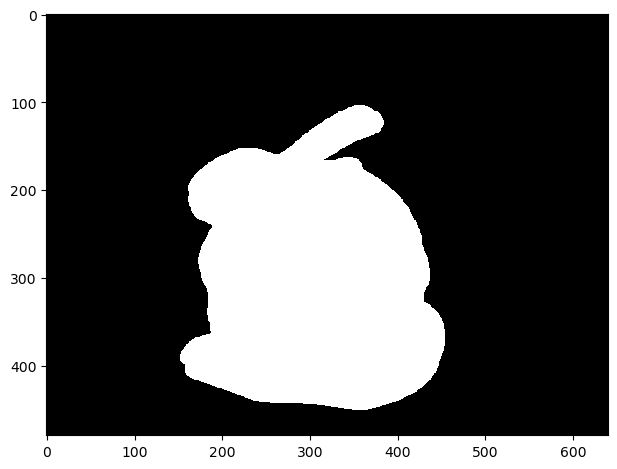

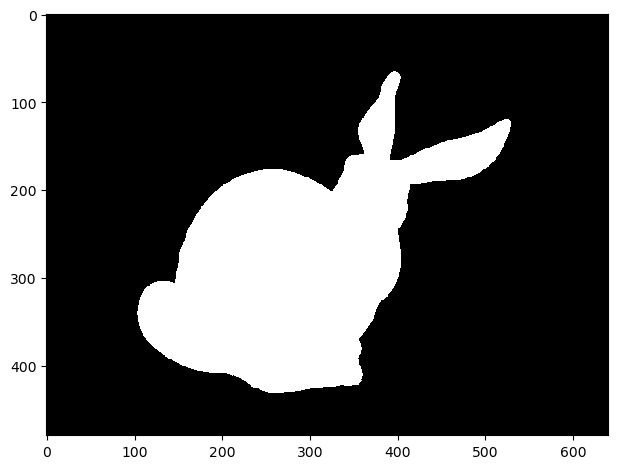

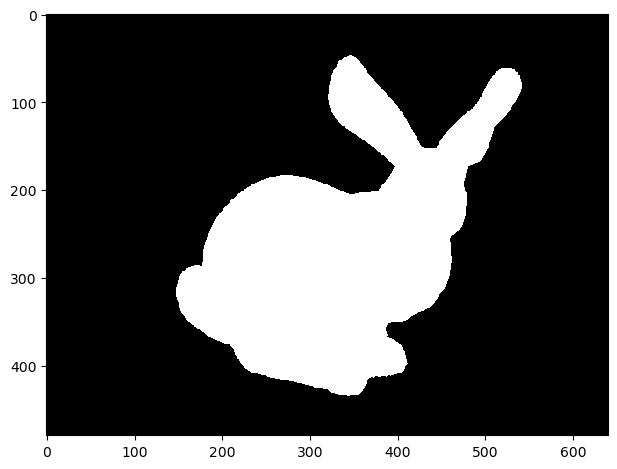

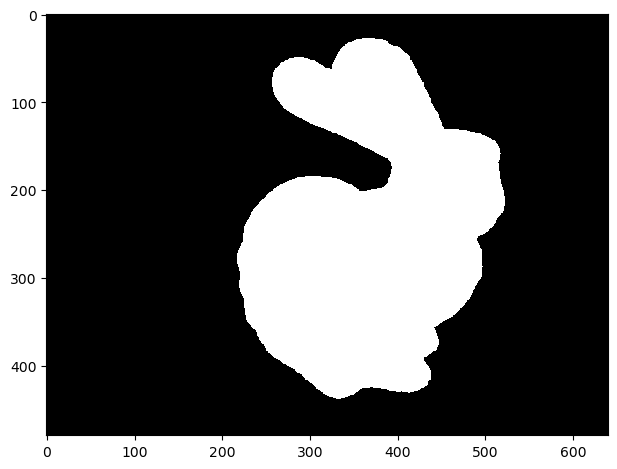

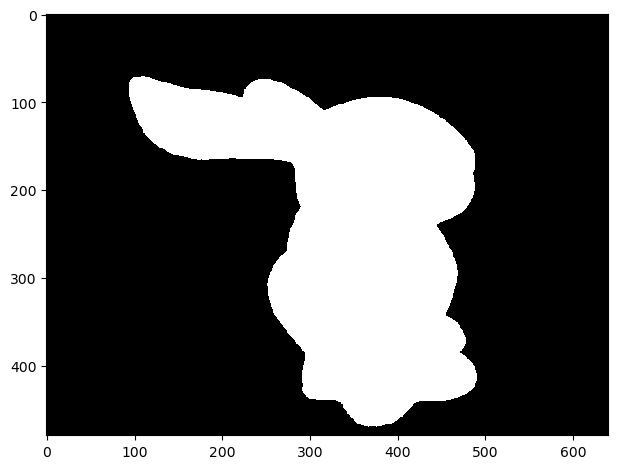

In [5]:
import cv2
import skimage as ski

def get_silhouette(image):
    imgray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    ret, thresh = cv2.threshold(imgray, 0.99, 1, cv2.THRESH_BINARY_INV)
    
    return thresh

silhouettes = []
for i in range(len(images)):
    image = ski.util.img_as_float(images[i])
    silhouette = get_silhouette(image)
    silhouette = ski.util.img_as_ubyte(silhouette)
    
    silhouettes.append(silhouette)
    ski.io.imshow(silhouette)
    ski.io.show()

In [6]:
def check_consistency(coords, silhouette):
    def is_consistent(x, y):
        in_frame = (0 < x) & (x < silhouette_width) & (0 < y) & (y < silhouette_height)
        if not in_frame: return False
        return silhouette[y, x] > 0
        
    silhouette_height = silhouette.shape[0]
    silhouette_width = silhouette.shape[1]
    px = coords[:, 0]
    py = coords[:, 1]
    
    return np.vectorize(is_consistent)(px, py)

# Initialize Voxels
voxel_count = 100j
xyz = np.mgrid[-1:1:voxel_count, -1:1:voxel_count, -1:1:voxel_count].reshape(3,-1).T
xyzw = np.hstack((xyz, np.ones([xyz.shape[0], 1], xyz.dtype)))

visual_hull = np.ones(xyz.shape[0], bool)
for i in range(len(images)):
    silhouette = silhouettes[i]
    
    homog_coords = intrinsics[i].dot(extrinsics[i].dot(xyzw.T)[:3])
    pixel_coords = (homog_coords[:2] / homog_coords[2]).T
    pixel_coords = np.round(pixel_coords).astype(int)
    
    visual_cone = check_consistency(pixel_coords, silhouette)
    visual_hull = visual_hull & visual_cone
    print(f'Found {np.count_nonzero(visual_cone)} consistent voxels in {i}th silhouette')

points = xyz[visual_hull]
pcd = o3d.geometry.PointCloud()
pcd.points = o3d.utility.Vector3dVector(points)
o3d.visualization.draw_geometries([pcd])

Found 282701 consistent voxels in 0th silhouette
Found 254398 consistent voxels in 1th silhouette
Found 261212 consistent voxels in 2th silhouette
Found 270621 consistent voxels in 3th silhouette
Found 285408 consistent voxels in 4th silhouette
Found 240819 consistent voxels in 5th silhouette
